### This is Example 4.3. Gambler’s Problem from Sutton's book.

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. 
If the coin comes up heads, he wins as many dollars as he has staked on that flip; 
if it is tails, he loses his stake. The game ends when the gambler wins by reaching his goal of $100, 
or loses by running out of money. 

On each flip, the gambler must decide what portion of his capital to stake, in integer numbers of dollars. 
This problem can be formulated as an undiscounted, episodic, finite MDP. 

The state is the gambler’s capital, s ∈ {1, 2, . . . , 99}.
The actions are stakes, a ∈ {0, 1, . . . , min(s, 100 − s)}. 
The reward is zero on all transitions except those on which the gambler reaches his goal, when it is +1.

The state-value function then gives the probability of winning from each state. A policy is a mapping from levels of capital to stakes. The optimal policy maximizes the probability of reaching the goal. Let p_h denote the probability of the coin coming up heads. If p_h is known, then the entire problem is known and it can be solved, for instance, by value iteration.


In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../") 


### Exercise 4.9 (programming)

Implement value iteration for the gambler’s problem and solve it for p_h = 0.25 and p_h = 0.55.



In [ ]:
def value_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1.0):
    """
    Args:
        p_h: Probability of the coin coming up heads
    """
    
    def one_step_lookahead(s, V, rewards):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            s: The gambler’s capital. Integer.
            V: The vector that contains values at each state. 
            rewards: The reward vector.
                        
        Returns:
            A vector containing the expected value of each action. 
            Its length equals to the number of actions.
        """
        action = range(1, min(s, 100-s)+1)  # 表示现在可以下注的钱,最多就s
        A = np.zeros(101)
        for a in action:
            A[a] += p_h*(rewards[min(s+a,100)]+ discount_factor*V[min(s+a,100)])+ (1-p_h)*(rewards[max(s-a,0)]+ discount_factor*V[max(s-a,0)])
        # Implement!
        
        return A
    
    # Implement!
    rewards = np.zeros(101)
    rewards[100] = 1
    V = np.zeros(101)
    policy = np.zeros(101) #不需要用2维了，直接使用每个state的赌注
    while True:
        delta = 0
        for s in range(100):
            A = one_step_lookahead(s,V,rewards)
            delta = max(delta, np.abs(V[s]-np.max(A)))
            V[s] = np.max(A)
        if delta<= theta:
            break
    for s in range(100):
        A = one_step_lookahead(s,V,rewards)
        # print("A",A)
        best_action = np.argmax(A)
        policy[s] = best_action
    
    return policy, V

In [18]:
policy, v = value_iteration_for_gamblers(0.25)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

A [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
A [0.0000000e+00 7.2479248e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.000

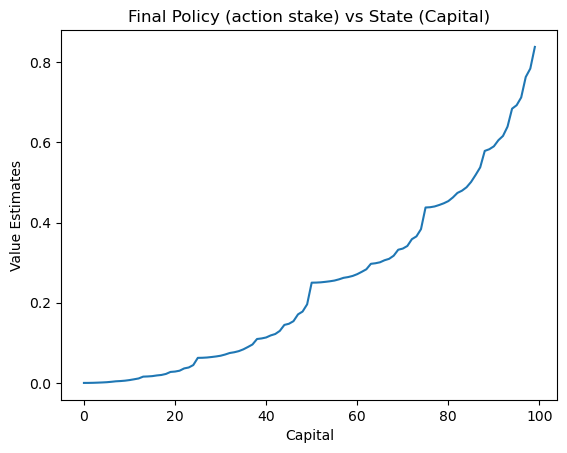

In [15]:
# Plotting Final Policy (action stake) vs State (Capital)

# x axis values
x = range(100)
# corresponding y axis values
y = v[:100]
 
# plotting the points 
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Value Estimates')
 
# giving a title to the graph
plt.title('Final Policy (action stake) vs State (Capital)')
 
# function to show the plot
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

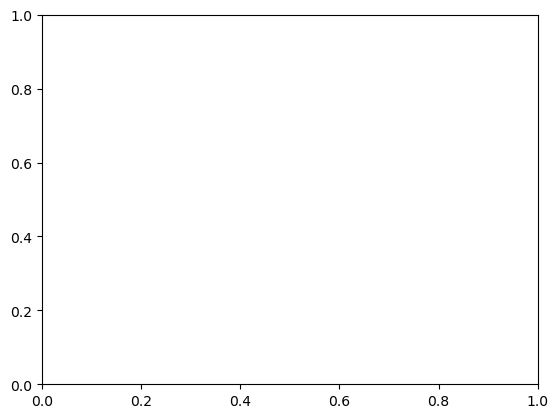

In [16]:
# Plotting Capital vs Final Policy

# x axis values
x = range(100)
# corresponding y axis values
y = policy
 
# plotting the bars
plt.bar(x, y, align='center', alpha=0.5)
 
# naming the x axis
plt.xlabel('Capital')
# naming the y axis
plt.ylabel('Final policy (stake)')
 
# giving a title to the graph
plt.title('Capital vs Final Policy')
 
# function to show the plot
plt.show()
